In [2]:
""" Simple CNN implementation with TensorFlow 2.0 for MNIST dataset.
Author: Askery Canabarro 
Tested with TF 2.3.0
"""

# STEP 0: Import TensorFlow and dependencies/libraries.
import numpy as np
import pandas as pd
import random
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.layers import Input, Conv2D, Dense, Flatten, Dropout, MaxPooling2D
from tensorflow.keras.models import Model
print ("TF version: ", tf.__version__)

TF version:  2.3.0


In [3]:
# STEP 1: Load the MNIST dataset.
(X_train,y_train),(X_test,y_test) =tf.keras.datasets.mnist.load_data()

In [4]:
# STEP 1a: Inspect type and shapes.
print ("Data type     ", type(X_train)) # numpy array. Nice!
print ("Xtrain shape: ", X_train.shape) # 60000 examples, 28 x 28 = 784 shape
print ("Xtest shape:  ", X_test.shape)  # 10000 examples, 28 x 28 = 784 shape
print ("ytrain shape: ", y_train.shape)
print ("ytest  shape: ", y_test.shape)

Data type      <class 'numpy.ndarray'>
Xtrain shape:  (60000, 28, 28)
Xtest shape:   (10000, 28, 28)
ytrain shape:  (60000,)
ytest  shape:  (10000,)


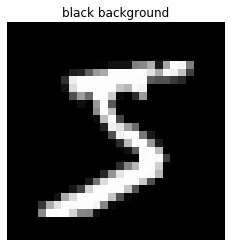

In [5]:
# STEP 1b: EDA
# print(X_train[0]), print(y_train[0])  # raw data

plt.imshow(X_train[0], cmap='gray')           # example of the data with black background
plt.axis('off')
plt.title('black background')
plt.show()

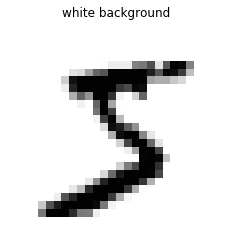

In [6]:
plt.imshow(255 - X_train[0], cmap='gray')     # example of the data with white background
plt.axis('off')
plt.title('white background')
plt.show()

In [7]:
# STEP 1c: Preprocessing. 

# Simple data augmentation: changing background "color" from black to white and adding in training set.
# Check EDA step again if needed.

X_train = np.concatenate((X_train, 255 - X_train), axis=0)
y_train = np.concatenate((y_train, y_train), axis=0)

# Rescale the images pixels from range [0,255] to range [0.0,1.0].
X_train = X_train/255
X_test  = X_test/255

# TensorFlow likes cube of data!!!
X_train = X_train.reshape((-1,28,28,1)) # 120000 instances with 28x28x1 shape
X_test  = X_test.reshape((-1,28,28,1))  # 10000 instances with 28x28x1 shape

print ("new training data shape: ", X_train.shape) # now 120000 examples!!, 28 x 28 = 784 shape

new training data shape:  (120000, 28, 28, 1)


In [8]:
# STEP 2: build the model (functional API)
K = len (set(y_train) )             # number of classes
i = Input(shape = X_train[0].shape) # 28x28x1: all inputs have the same shape, get the shape of the first one.
x = Conv2D(  32, [3,3], activation='relu')(i)
x = Conv2D(  64, [3,3], activation='relu')(x)
x = MaxPooling2D(pool_size=(2, 2))(x)
x = Dropout(0.25)(x)
x = Flatten()(x)
x = Dense(128,activation='relu')(x)
x = Dropout(0.5)(x)
x = Dense(K,activation='softmax')(x)

model = Model(i,x)

print(model.summary())

Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 28, 28, 1)]       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 24, 24, 64)        18496     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 12, 12, 64)        0         
_________________________________________________________________
dropout (Dropout)            (None, 12, 12, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 9216)              0         
_________________________________________________________________
dense (Dense)                (None, 128)              

In [9]:
# optimization and loss parameters
opt  = "adam"
cost = "sparse_categorical_crossentropy"
model.compile(optimizer=opt,
                   loss=cost,
                metrics=['accuracy'])

In [10]:
# STEP 3: Train the model.

r = model.fit(X_train,y_train, 
          validation_data=(X_test,y_test), 
          epochs=20)

Epoch 1/20
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
3741/3750 [============================>.] - ETA: 0s - loss: 0.1925 - accuracy: 0.9410WARNING:tensorflow:AutoGraph could not transform <function Model.make_test_function.<locals>.test_function at 0x7f89b7694f28> and will run it as-is.
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) 

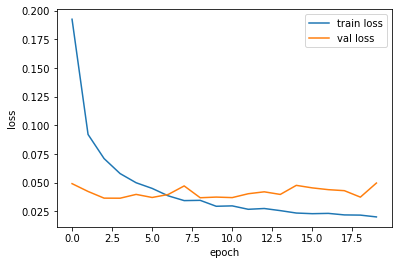

In [11]:
# STEP 3a: See loss and accuracy in function of epochs
# Loss
plt.plot(r.history['loss'], label ='train loss')
plt.plot(r.history['val_loss'], label ='val loss')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend()
plt.show()

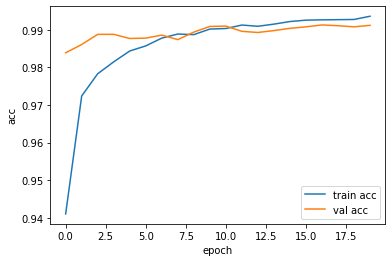

In [13]:
# Accuracy
plt.plot(r.history['accuracy'], label ='train acc')
plt.plot(r.history['val_accuracy'], label ='val acc')
plt.xlabel('epoch')
plt.ylabel('acc')
plt.legend()
plt.show()

In [14]:
# STEP 4: Evaluate your model.
print("Test acc:", model.evaluate(X_test,y_test)[1])

313/313 [==============================] - 1s 2ms/step - loss: 0.0498 - accuracy: 0.9912
Test acc: 0.9911999702453613


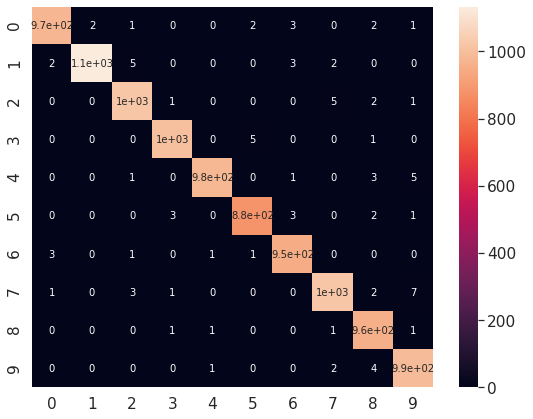

In [16]:
# STEP 4a: Deeper evaluate your model.
inv  = model.predict(X_test)
inv  = np.array ( list (map(np.argmax, inv)) ) 

from sklearn.metrics import confusion_matrix, plot_confusion_matrix
clas   = list(map(str,range(0,10)))
preds  = model.predict(X_test)
P      = np.array ( list (map(np.argmax, preds)) )
cm     = confusion_matrix(P,y_test)
df_cm  = pd.DataFrame(cm, index = clas, columns = clas, dtype='int32')

import seaborn as sn
plt.figure(figsize=(9,7))
sn.set(font_scale=1.4) 
sn.heatmap(df_cm, annot=True, annot_kws={"size": 10}) 
plt.show()

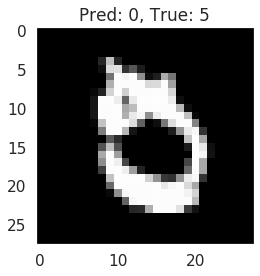

In [18]:
# STEP 4b: even deeper evaluation. Check misclassification example. Is it acceptable?
ind_err = np.array ( np.where(P != y_test) ).flatten() # getting indices where prediction differs from actual class
ind     = np.random.choice(ind_err)
plt.imshow(X_test[ind].reshape((28,28)), cmap = "gray")
plt.title ("Pred: " + str(clas[P[ind]]) + ", True: " + str(clas[y_test[ind]]))
plt.grid(False)
plt.show()